# Plotting Query Results

## Setup

In [1]:
# Import Matplot lib
import matplotlib
from matplotlib import style
style.use('seaborn')
import matplotlib.pyplot as plt

In [2]:
import pandas as pd
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect

In [3]:
# Import SQLAlchemy `automap` and other dependencies here
# YOUR CODE HERE

Base = automap_base()


In [4]:
# Create an engine for the `emoji.sqlite` database
engine = create_engine("sqlite:///Resources/emoji.sqlite", echo=False)

Base.prepare(engine, reflect=True)

session = Session(engine)

## Explore Database

In [5]:
# Use the Inspector to explore the database and print the table names
# YOUR CODE HERE
#Base.classes.keys()
#emoji = Base.classes.emoji
inspector = inspect(engine)
inspector.get_table_names()


['emoji']

In [6]:
# Use Inspector to print the column names and types
# YOUR CODE HERE
columns = inspector.get_columns('emoji')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
emoji_char TEXT
emoji_id TEXT
name TEXT
score INTEGER


In [7]:
# Use `engine.execute` to select and display the first 10 rows from the emoji table
# YOUR CODE HERE
first_ten= engine.execute("Select * from emoji limit 10")

first_ten

for x in first_ten:
    print(x)

(1, '😂', '1F602', 'FACE WITH TEARS OF JOY', 1814832150)
(2, '❤️', '2764', 'HEAVY BLACK HEART', 840619939)
(3, '😍', '1F60D', 'SMILING FACE WITH HEART-SHAPED EYES', 680382416)
(4, '♥️', '2665', 'BLACK HEART SUIT', 652715459)
(5, '😭', '1F62D', 'LOUDLY CRYING FACE', 515991922)
(6, '😊', '1F60A', 'SMILING FACE WITH SMILING EYES', 484540701)
(7, '♻️', '267B', 'BLACK UNIVERSAL RECYCLING SYMBOL', 452489849)
(8, '😒', '1F612', 'UNAMUSED FACE', 441690175)
(9, '💕', '1F495', 'TWO HEARTS', 381679908)
(10, '😘', '1F618', 'FACE THROWING A KISS', 377847645)


## Reflect database and Query

In [8]:
# Reflect Database into ORM class
Base = automap_base()
Base.prepare(engine, reflect=True)
Emoji = Base.classes.emoji

In [9]:
# Start a session to query the database
session = Session(engine)

Use Matplotlib to create a horizontal bar chart and plot the emoji `score` in descending order. Use `emoji_char` as the y-axis labels. Plot only the top 10 emojis ranked by score

In [11]:
# Query Emojis for `emoji_char`, `emoji_id`, and `score` and save the query into results
# YOUR CODE HERE
emoji_sesh=session.query(Emoji.emoji_char, Emoji.emoji_id, Emoji.score).all()


Unpack tuples using list comprehensions

In [12]:
# Unpack the `emoji_id` and `scores` from results and save into separate lists
# YOUR CODE HERE
e_char= [ emoji_sesh[x][0] for x in range (len(emoji_sesh))]


e_id = [ emoji_sesh[x][1] for x in range (len(emoji_sesh))]


e_score= [emoji_sesh[x][2] for x in range (len(emoji_sesh))]



## Plot using Matplotlib

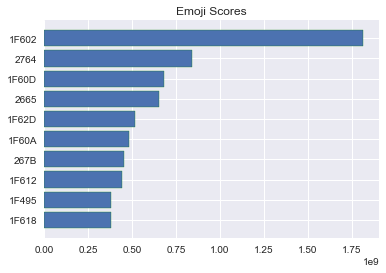

In [13]:
# Create a horizontal bar chart and plot the `emoji_id` on the y-axis and the `score` on the x-axis
# Challenge: Try to plot the scores in descending order on the graph (The largest score is at the top)
# YOUR CODE HERE

score_ten= e_score[:10]
id_ten = e_id[:10]
char_ten= e_score[:10]

x = char_ten
y= score_ten

plt.title("Emoji Scores")
plt.gca().invert_yaxis()

plt.barh(id_ten, score_ten, edgecolor = 'g')
plt.show()


## Plot using Pandas Plotting

Load the results into a Pandas DataFrame

In [14]:
# Load the results into a pandas dataframe. Set the index to the `emoji_id`
# YOUR CODE HERE
df= pd.DataFrame(emoji_sesh)
df.head(10)
emoji_df=df.set_index("emoji_id")
emoji_df

,emoji_char,score
emoji_id,,
1F602,😂,1814832150
2764,❤️,840619939
1F60D,😍,680382416
2665,♥️,652715459
1F62D,😭,515991922
...,...,...
1F6C2,🛂,103654
1F520,🔠,103234
1F521,🔡,101160


Plot using Pandas

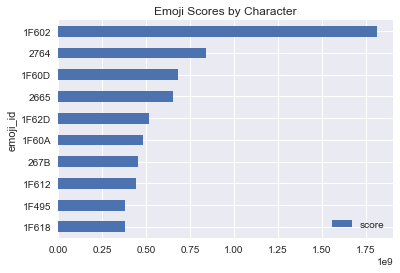

In [17]:
# Plot the dataframe as a horizontal bar chart using pandas plotting
# YOUR CODE HERE
emoji_df

score_id= emoji_df[["emoji_char", "score"]].head(10)

score_plot=score_id.plot(kind= 'barh')
plt.title("Emoji Scores by Character")
score_plot.invert_yaxis()